In [8]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

/anaconda3/lib/python3.7/site-packages/scipy/__init__.py:137: UserWarning: NumPy 1.16.5 or above is required for this version of SciPy (detected version 1.16.2)
  UserWarning)


In [9]:
StopAndFrisk = pd.read_csv("/Users/jordancreenaune/Desktop/Python_for_Data_Science/Jordan_Projects/StopAndFrisk/2018_sqf_database.csv")

In [10]:
# def clean_data(StopAndFrisk): 
# Statement will replace any (null) values with the average age of 23 
StopAndFrisk.SUSPECT_REPORTED_AGE[StopAndFrisk.SUSPECT_REPORTED_AGE =='(null)'] = 23


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
StopAndFrisk.head()

,STOP_FRISK_ID,STOP_FRISK_DATE,Stop Frisk Time,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/1/18,19:04:00,2018,January,Monday,Based on C/W on Scene,APP,POM,1,...,G,(null),VARICK STREET && FRANKLIN STREET,(null),VARICK STREET,982327,201274,(null),PBMS,MANHATTAN
1,2,1/1/18,23:00:00,2018,January,Monday,Based on Radio Run,APP,POM,34,...,C,(null),DYCKMAN STREET && POST AVENUE,(null),DYCKMAN STREET,1004892,253548,(null),PBMN,MANHATTAN
2,3,1/1/18,23:55:00,2018,January,Monday,Based on Radio Run,APP,POM,808,...,B,4M,2245 RANDALL AVENUE,(null),RANDALL AVENUE,1026706,237776,(null),PBBX,BRONX
3,4,1/1/18,3:23:00,2018,January,Monday,Based on Radio Run,APP,POM,63,...,B,(null),EAST 38 STREET && AVENUE L,(null),EAST 38 STREET,1001347,166195,(null),PBBS,BROOKLYN
4,5,1/1/18,3:23:00,2018,January,Monday,Based on Radio Run,APP,POM,63,...,B,(null),EAST 38 STREET && AVENUE L,(null),EAST 38 STREET,1001347,166195,(null),PBBS,BROOKLYN


In [12]:
#This loc statement - selects multiple rows and columns inclusively. 
StopAndFrisk.loc[0:5,'STOP_FRISK_DATE':'STOP_WAS_INITIATED']


,STOP_FRISK_DATE,Stop Frisk Time,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED
0,1/1/18,19:04:00,2018,January,Monday,Based on C/W on Scene
1,1/1/18,23:00:00,2018,January,Monday,Based on Radio Run
2,1/1/18,23:55:00,2018,January,Monday,Based on Radio Run
3,1/1/18,3:23:00,2018,January,Monday,Based on Radio Run
4,1/1/18,3:23:00,2018,January,Monday,Based on Radio Run
5,1/1/18,21:20:00,2018,January,Monday,Based on Self Initiated


In [13]:
# This iloc statement uses indexing to select the 64th Row of the Data Frame 
#The 64th row in this data set holds race information 
StopAndFrisk.iloc[:,63].head()

0    23
1    26
2    40
3    38
4    36
Name: SUSPECT_REPORTED_AGE, dtype: object

In [14]:
#This loc statement - will show ONLY the row. 
StopAndFrisk.loc[1947,]


STOP_FRISK_ID                          1948
STOP_FRISK_DATE                      3/6/18
Stop Frisk Time                    16:20:00
YEAR2                                  2018
MONTH2                                March
                                    ...    
STOP_LOCATION_X                      996551
STOP_LOCATION_Y                      223272
STOP_LOCATION_ZIP_CODE               (null)
STOP_LOCATION_PATROL_BORO_NAME         PBMN
STOP_LOCATION_BORO_NAME           MANHATTAN
Name: 1947, Length: 83, dtype: object

In [15]:
#This uses loc to select first the row number (this an int) and then the column name then the suspect race description
#suspect race description has been assigned an integer see below.
StopAndFrisk.loc[1947,'SUSPECT_RACE_DESCRIPTION']


'WHITE HISPANIC'

In [16]:
#This statement will select multiple rows and columns using loc , with specific labled columns

StopAndFrisk.loc[[1947,1950],['YEAR2','STOP_WAS_INITIATED']]

,YEAR2,STOP_WAS_INITIATED
1947,2018,Based on Self Initiated
1950,2018,Based on Self Initiated


In [17]:
#This statement will select multiple rows and columns using loc using INCLUSIVE columns 

first3 = StopAndFrisk.loc[0:2,'YEAR2':'STOP_WAS_INITIATED']
first3

,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED
0,2018,January,Monday,Based on C/W on Scene
1,2018,January,Monday,Based on Radio Run
2,2018,January,Monday,Based on Radio Run


In [18]:
StopAndFrisk[StopAndFrisk.SUSPECT_RACE_DESCRIPTION=='BLACK']

,STOP_FRISK_ID,STOP_FRISK_DATE,Stop Frisk Time,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
5,6,1/1/18,21:20:00,2018,January,Monday,Based on Self Initiated,APP,POM,71,...,C,(null),178 ROCKAWAY PARKWAY,(null),ROCKAWAY PARKWAY,1006033,180591,(null),PBBS,BROOKLYN
6,7,1/1/18,0:00:00,2018,January,Monday,Based on Self Initiated,APP,POM,425,...,B,(null),625 EAST 40 STREET,(null),EAST 40 STREET,1001224,172560,(null),PBBS,BROOKLYN
7,8,1/1/18,0:00:00,2018,January,Monday,Based on Self Initiated,APP,POM,425,...,B,(null),625 EAST 40 STREET,(null),EAST 40 STREET,1001224,172560,(null),PBBS,BROOKLYN
8,9,1/1/18,0:00:00,2018,January,Monday,Based on Self Initiated,APP,POM,425,...,B,(null),625 EAST 40 STREET,(null),EAST 40 STREET,1001224,172560,(null),PBBS,BROOKLYN
9,10,1/1/18,0:00:00,2018,January,Monday,Based on Self Initiated,APP,POM,425,...,B,(null),625 EAST 40 STREET,(null),EAST 40 STREET,1001224,172560,(null),PBBS,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10998,10999,12/31/18,22:43:00,2018,December,Monday,Based on Radio Run,APP,POM,803,...,B,(null),505 GATES AVENUE,(null),GATES AVENUE,999081,189462,(null),PBBN,BROOKLYN
10999,11000,12/31/18,14:00:00,2018,December,Monday,Based on Radio Run,APP,POM,103,...,D,(null),108-28 173 STREET,(null),173 STREET,1044532,194166,(null),PBQS,QUEENS
11000,11001,12/31/18,14:00:00,2018,December,Monday,Based on Radio Run,APP,POM,103,...,D,(null),108-28 173 STREET,(null),173 STREET,1044532,194166,(null),PBQS,QUEENS
11003,11004,12/31/18,12:43:00,2018,December,Monday,Based on Radio Run,APP,POM,121,...,A,(null),2321 FOREST AVENUE,(null),FOREST AVENUE,937802,167946,(null),PBSI,STATEN ISLAND


In [19]:
#This statement will isolate only given values that have been selected in a column 
StopAndFrisk.loc[StopAndFrisk.SUSPECT_RACE_DESCRIPTION=='BLACK',:]

,STOP_FRISK_ID,STOP_FRISK_DATE,Stop Frisk Time,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
5,6,1/1/18,21:20:00,2018,January,Monday,Based on Self Initiated,APP,POM,71,...,C,(null),178 ROCKAWAY PARKWAY,(null),ROCKAWAY PARKWAY,1006033,180591,(null),PBBS,BROOKLYN
6,7,1/1/18,0:00:00,2018,January,Monday,Based on Self Initiated,APP,POM,425,...,B,(null),625 EAST 40 STREET,(null),EAST 40 STREET,1001224,172560,(null),PBBS,BROOKLYN
7,8,1/1/18,0:00:00,2018,January,Monday,Based on Self Initiated,APP,POM,425,...,B,(null),625 EAST 40 STREET,(null),EAST 40 STREET,1001224,172560,(null),PBBS,BROOKLYN
8,9,1/1/18,0:00:00,2018,January,Monday,Based on Self Initiated,APP,POM,425,...,B,(null),625 EAST 40 STREET,(null),EAST 40 STREET,1001224,172560,(null),PBBS,BROOKLYN
9,10,1/1/18,0:00:00,2018,January,Monday,Based on Self Initiated,APP,POM,425,...,B,(null),625 EAST 40 STREET,(null),EAST 40 STREET,1001224,172560,(null),PBBS,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10998,10999,12/31/18,22:43:00,2018,December,Monday,Based on Radio Run,APP,POM,803,...,B,(null),505 GATES AVENUE,(null),GATES AVENUE,999081,189462,(null),PBBN,BROOKLYN
10999,11000,12/31/18,14:00:00,2018,December,Monday,Based on Radio Run,APP,POM,103,...,D,(null),108-28 173 STREET,(null),173 STREET,1044532,194166,(null),PBQS,QUEENS
11000,11001,12/31/18,14:00:00,2018,December,Monday,Based on Radio Run,APP,POM,103,...,D,(null),108-28 173 STREET,(null),173 STREET,1044532,194166,(null),PBQS,QUEENS
11003,11004,12/31/18,12:43:00,2018,December,Monday,Based on Radio Run,APP,POM,121,...,A,(null),2321 FOREST AVENUE,(null),FOREST AVENUE,937802,167946,(null),PBSI,STATEN ISLAND


In [20]:
# These statements assign values to the different races from the data using loc
# Loc statements - make sure to use the column names and descriptors when selecting

StopAndFrisk.loc[StopAndFrisk["SUSPECT_RACE_DESCRIPTION"]=="WHITE","SUSPECT_RACE_DESCRIPTION"] = 0
StopAndFrisk.loc[StopAndFrisk["SUSPECT_RACE_DESCRIPTION"]=="WHITE HISPANIC","SUSPECT_RACE_DESCRIPTION"] = 1
StopAndFrisk.loc[StopAndFrisk["SUSPECT_RACE_DESCRIPTION"]=="BLACK","SUSPECT_RACE_DESCRIPTION"] = 2
StopAndFrisk.loc[StopAndFrisk["SUSPECT_RACE_DESCRIPTION"]=="BLACK HISPANIC","SUSPECT_RACE_DESCRIPTION"] = 3
StopAndFrisk.loc[StopAndFrisk["SUSPECT_RACE_DESCRIPTION"]=="ASIAN / PACIFIC ISLANDER","SUSPECT_RACE_DESCRIPTION"] = 4
StopAndFrisk.loc[StopAndFrisk["SUSPECT_RACE_DESCRIPTION"]=="AMERICAN INDIAN/ALASKAN NATIVE","SUSPECT_RACE_DESCRIPTION"] = 5
StopAndFrisk.loc[StopAndFrisk["SUSPECT_RACE_DESCRIPTION"]=="(null)","SUSPECT_RACE_DESCRIPTION"] = 6


In [21]:
# This statement - turns suspected reported age from a string to an integer 
StopAndFrisk['SUSPECT_REPORTED_AGE'] = StopAndFrisk['SUSPECT_REPORTED_AGE'].astype(int)


# This statement sorts the data in ascending order - based on the age column 
StopAndFrisk = StopAndFrisk.sort_values(by ='SUSPECT_REPORTED_AGE' )

In [22]:
#Loc and Iloc - in square brackets - [:,0 ] means column 1 

Y = StopAndFrisk.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
X = StopAndFrisk.iloc[:, 63].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

<IPython.core.display.Javascript object>


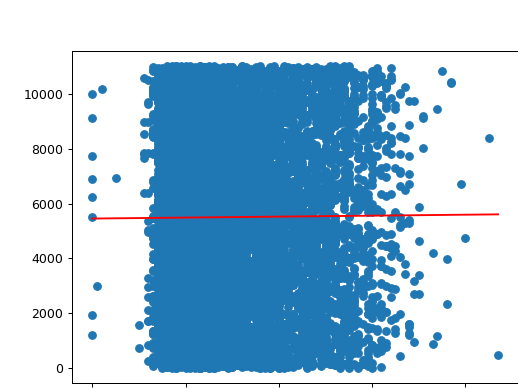

In [23]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

<IPython.core.display.Javascript object>


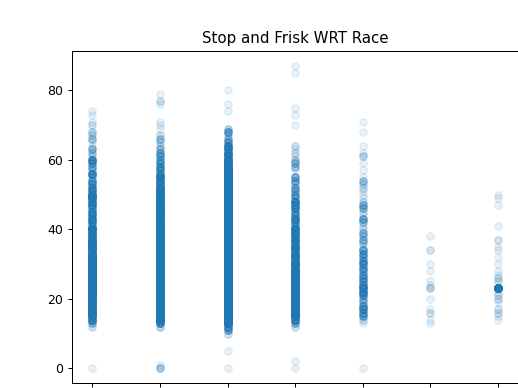

In [24]:
plt.figure(3)
plt.title('Stop and Frisk WRT Race')
plt.scatter(StopAndFrisk.SUSPECT_RACE_DESCRIPTION, StopAndFrisk.SUSPECT_REPORTED_AGE, alpha = 0.1)